In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
r =0.8
def buy(x,y,dy):
    dx = (x*y/(y-dy) - x)/r
    return x+r*dx, y-dy, (1-r)*dx
def sell(x,y,dx):
    dy = ( x*y/(x-dx) - y)/r
    return x - dx , y+ r*dy, (1-r)*dy 
def deposit(x,y,W):
    price = x/y
    return 1/2 * W , 1/2 * W /price

In [97]:
x0= 7112801
y0 = 4321
dy =1241
N= 100000
x=x0
y=y0
for i in range(N):
    x,y,fee = buy(x,y,dy/N)
    x +=fee 


In [102]:
x**r*y , x0**r*y0 

(1309835419.614839, 1309835609.084373)

In [104]:
def buy_all(x0,y0,dy,N):
    x=x0
    y=y0
    for i in range(N):
        x,y,fee = buy(x,y,dy/N)
        Dx,Dy = deposit(x,y,fee)
        x,y = x+Dx , y + Dy
    return (x**r*y)/(x0**r*y0) - 1
def sell_all(x0,y0,dy,N):
    x=x0
    y=y0
    for i in range(N):
        x,y,fee = sell(x,y,dy/N)
        Dx,Dy = deposit(x,y,fee)
        x,y = x+Dx , y + Dy
    return (x**r*y)/(x0**r*y0) - 1

In [105]:
 buy_all(x0,y0,dy,N)

0.008303267938454484

##　$(\ln Z_n , M_n)$ state space

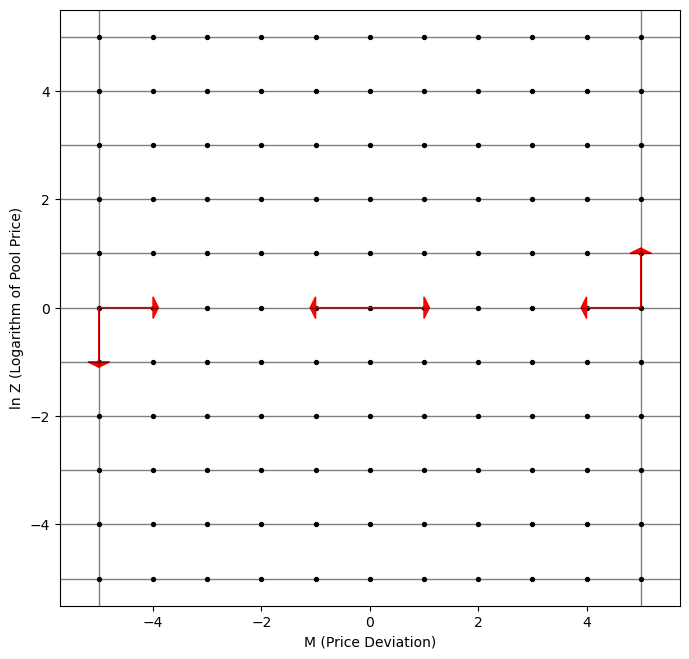

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Define the state space
ln_Z_values = np.arange(-5, 6, 1)  # ln Z values
M_values = np.arange(-5, 6, 1)     # M values

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 12))

# Plot the grid points
for ln_Z in ln_Z_values:
    for M in M_values:
        ax.scatter(M, ln_Z, s=8,c='k')  # Black points for states

# Plot the possible transitions with red arrows
for ln_Z in ln_Z_values:
    ax.axhline(y = ln_Z,lw=1,alpha=0.5,c='k')
ax.axvline(x = -5,c='k',lw=1,alpha=0.5)
ax.axvline(x=5,lw=1,c='k',alpha=0.5)

hw = 0.4
hl=0.1
ax.arrow(5, 0, 0, 1, head_width=hw, head_length=hl, fc='red', ec='red')  # price Up
ax.arrow(5, 0, -1, 0, head_width=hw, head_length=hl, fc='red', ec='red')  

ax.arrow(-5, 0, 0, -1, head_width=hw, head_length=hl, fc='red', ec='red')  # price Down
ax.arrow(-5, 0, 1, 0, head_width=hw, head_length=hl, fc='red', ec='red')  

ax.arrow(0, 0, 1, 0, head_width=hw, head_length=hl, fc='red', ec='red')  # price remains
ax.arrow(0, 0, -1, 0, head_width=hw, head_length=hl, fc='red', ec='red')  
# Set labels and title
ax.set_xlabel('M (Price Deviation)')
ax.set_ylabel('ln Z (Logarithm of Pool Price)')
ax.set_aspect('equal')

# Show the plot
plt.show()
